<a href="https://colab.research.google.com/github/HebaRouk/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Heba_Rouk11_Loan_Acceptance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Lifecycle
© 2024, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [2]:

import pandas as pd

# Load training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test (1).csv')

# Display basic info about the datasets
print("Training Data Overview:")
print(train_data.info())
print("\nTesting Data Overview:")
print(test_data.info())

# Preview datasets
print("\nTrain Data Head:")
print(train_data.head())

print("\nTest Data Head:")
print(test_data.head())

Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             503 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         501 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      486 non-null    object 
 6   ApplicantIncome    513 non-null    int64  
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     470 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ KB
None

Testing Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entri

# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [3]:
# Step 2: Read & Visualize Data

# Import necessary libraries
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train.csv')  # Replace with the correct path for your dataset
test_data = pd.read_csv('test (1).csv')    # Replace with the correct path for your dataset

# Combine the two datasets
# Assuming both datasets have the same structure, we can concatenate them
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Display the first few rows of the combined dataset
print("Combined Data Preview:")
print(combined_data.head())

# Visualize summary statistics
print("\nSummary Statistics:")
print(combined_data.describe())

# Visualize missing values
print("\nMissing Data Count:")
print(combined_data.isnull().sum())

Combined Data Preview:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N

# 3. Exploratory Data Analysis


Start by getting the number of rows and the number of columns that you have in your dataset

In [4]:
# Step 3: Exploratory Data Analysis

# Get the number of rows and columns in the dataset
num_rows, num_columns = combined_data.shape

# Print the results
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 614 rows and 13 columns.


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [5]:


combined_data_info = combined_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Where did you find some missing values?     

Missing values in columns that are crucial for model prediction (like loan amount or credit history) require particular attention, as dropping them or improperly handling them could introduce bias or skew results




##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [6]:
# Step 3: Exploratory Data Analysis (continued)

# Use describe() to get summary statistics for numerical features
numerical_summary = combined_data.describe()

# Print the summary statistics
print("Summary Statistics for Numerical Features:")
print(numerical_summary)


Summary Statistics for Numerical Features:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Print the unique values of the variable Credit_History

In [7]:
# Step 3: Exploratory Data Analysis (continued)

# Use describe() to get summary statistics for numerical features
numerical_summary = combined_data.describe()

# Print the summary statistics
print("Summary Statistics for Numerical Features:")
print(numerical_summary)


Summary Statistics for Numerical Features:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


Do the same with the variable Loan_Amount_Term

In [8]:
# Print the unique values of the 'Loan_Amount_Term' column
loan_amount_term_unique = combined_data['Loan_Amount_Term'].unique()

# Display the unique values
print("Unique values in the 'Loan_Amount_Term' column:")
print(loan_amount_term_unique)


Unique values in the 'Loan_Amount_Term' column:
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [9]:
# Step 3: Exploratory Data Analysis (continued)

# Use describe() to get summary statistics for categorical features
categorical_summary = combined_data.describe(include='object')

# Print the summary statistics for categorical features
print("Summary Statistics for Categorical Features:")
print(categorical_summary)


Summary Statistics for Categorical Features:
         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422  


Interpret the results you obtained for the variable Gender

If gender is not skewed or does not show significant differences in approval rates across the two genders, it suggests that gender likely does not affect loan approval status.
If gender does show skewed results (for example, more loans are approved for one gender), then it would be worth exploring the reasons behind this, as it could reflect potential bias or other systemic factors influencing the loan process.


Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [10]:
# Compute the frequency of each unique value in the 'Property_Area' column
property_area_frequency = combined_data['Property_Area'].value_counts()

# Print the frequency for each unique value in the 'Property_Area' column
print("Frequency for each unique value in 'Property_Area':")
print(property_area_frequency)


Frequency for each unique value in 'Property_Area':
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [11]:
# Compute the frequency of each unique value in the 'Dependents' column
dependents_frequency = combined_data['Dependents'].value_counts()

# Print the frequency for each unique value in the 'Dependents' column
print("Frequency for each unique value in 'Dependents':")
print(dependents_frequency)


Frequency for each unique value in 'Dependents':
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [12]:
# Create a new dataframe by removing rows with any NaN values
removeNA_df = combined_data.dropna()

# Print the first few rows of the new dataframe to verify
print("Dataframe with null values removed (removeNA_df):")
print(removeNA_df.head())


Dataframe with null values removed (removeNA_df):
    Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area Loan_Status  
1             1.0         Rural           N  
2             1.

Plot the distribution and the boxplot for the variable 'LoanAmount'

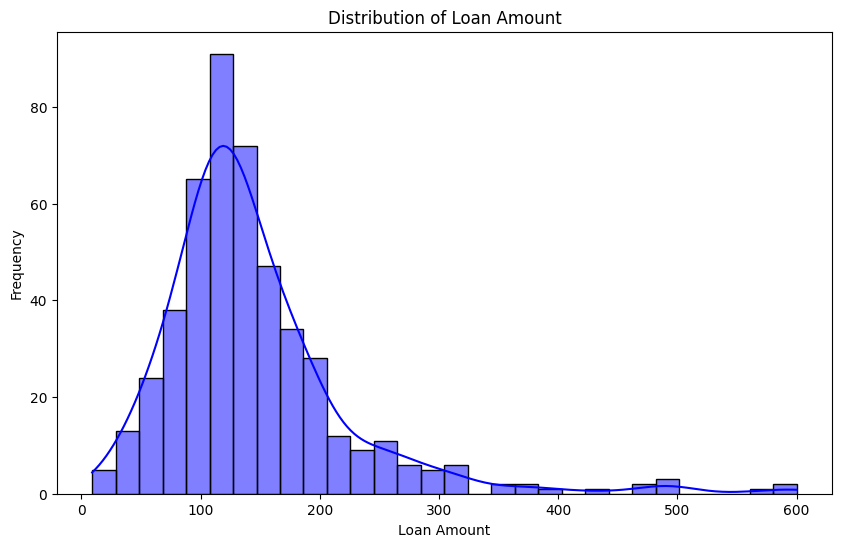

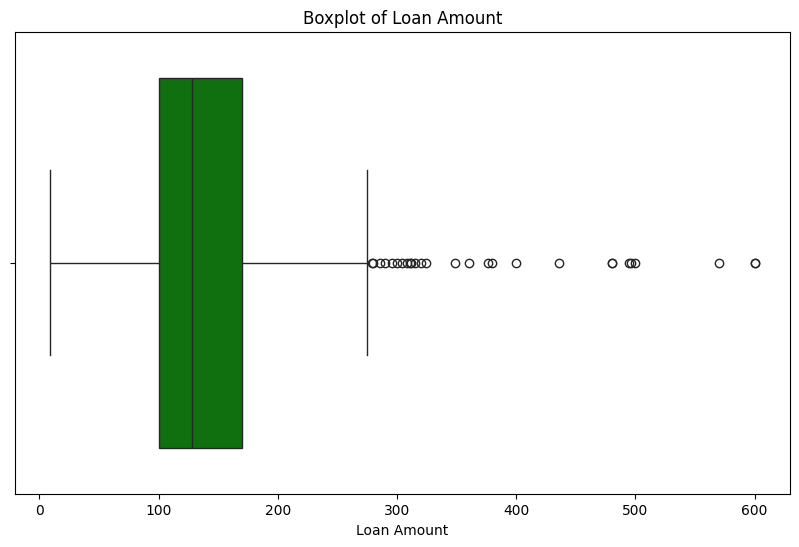

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'LoanAmount' variable
plt.figure(figsize=(10, 6))
sns.histplot(removeNA_df['LoanAmount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of the 'LoanAmount' variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=removeNA_df['LoanAmount'], color='green')
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()


* Is there any outlier?
* Is the data skewed?

yes
yes

Do the same for the variable 'ApplicantIncome'

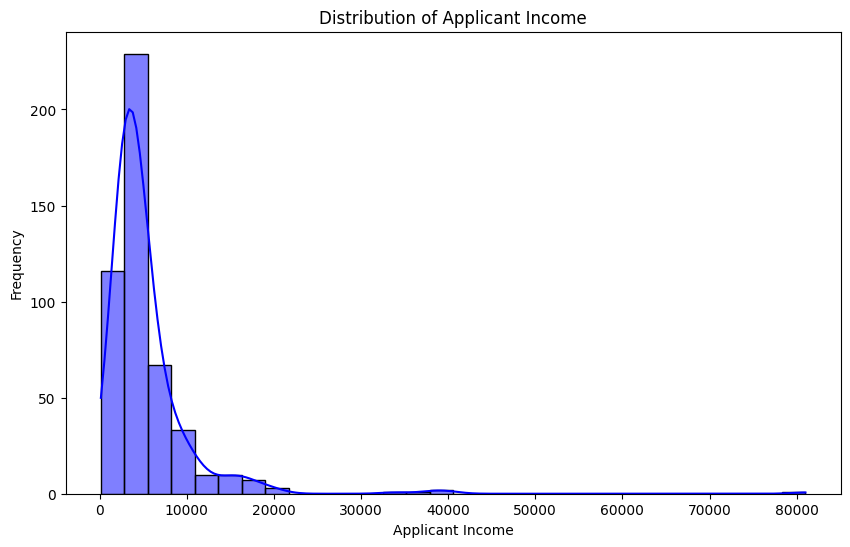

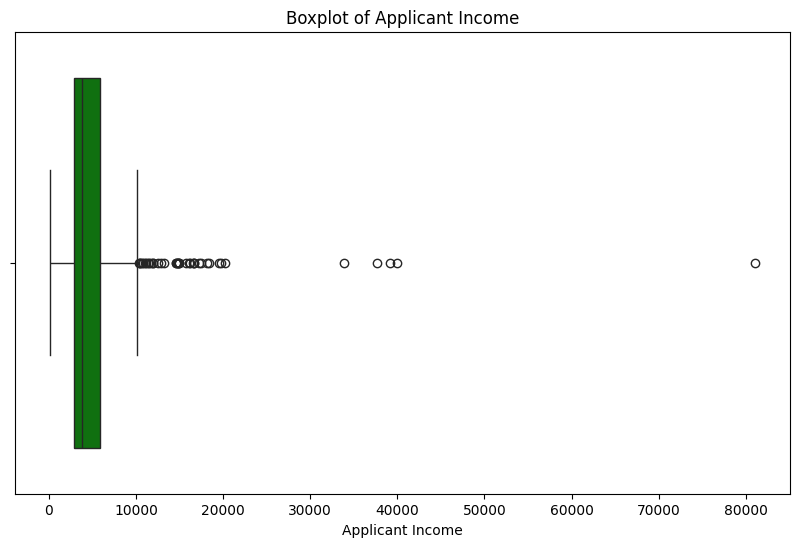

In [14]:
# Plot the distribution of the 'ApplicantIncome' variable
plt.figure(figsize=(10, 6))
sns.histplot(removeNA_df['ApplicantIncome'], kde=True, bins=30, color='blue')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of the 'ApplicantIncome' variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=removeNA_df['ApplicantIncome'], color='green')
plt.title('Boxplot of Applicant Income')
plt.xlabel('Applicant Income')
plt.show()


* Is there any outlier?
* Is the data skewed?

yes

Do the same for 'CoapplicantIncome'

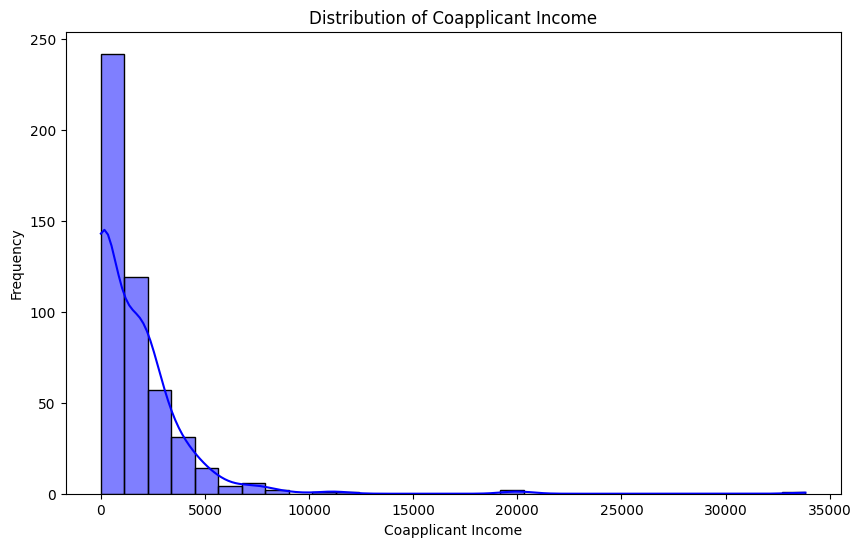

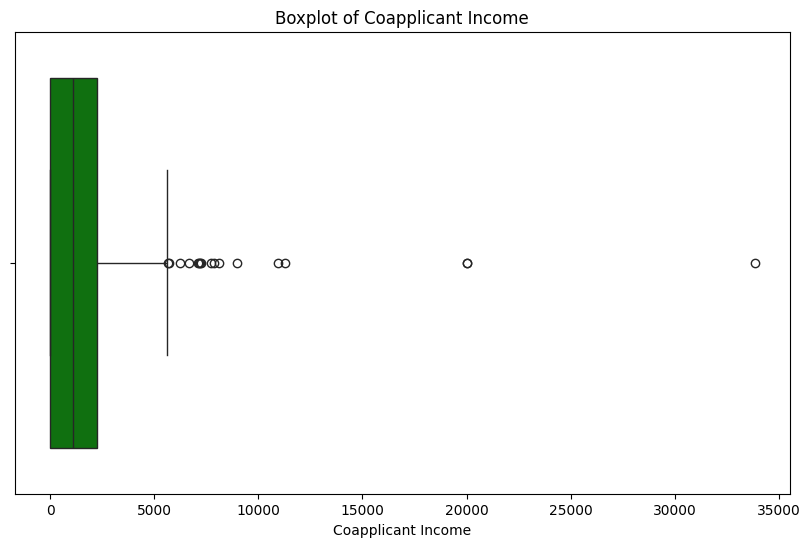

In [15]:
# Plot the distribution of the 'CoapplicantIncome' variable
plt.figure(figsize=(10, 6))
sns.histplot(removeNA_df['CoapplicantIncome'], kde=True, bins=30, color='blue')
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of the 'CoapplicantIncome' variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=removeNA_df['CoapplicantIncome'], color='green')
plt.title('Boxplot of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.show()


**[Share your Zaka here]**

Do the same for 'Loan_Amount_Term'

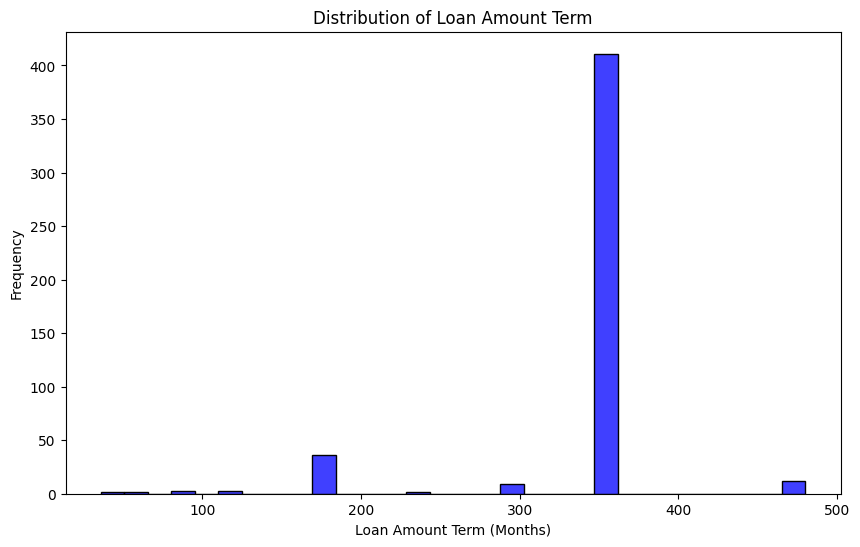

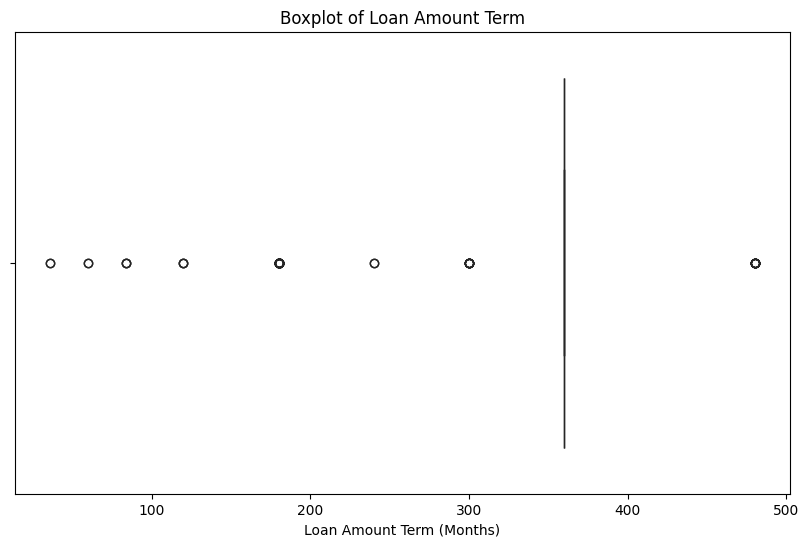

In [16]:
# Plot the distribution of the 'Loan_Amount_Term' variable
plt.figure(figsize=(10, 6))
sns.histplot(removeNA_df['Loan_Amount_Term'], kde=False, bins=30, color='blue')
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term (Months)')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of the 'Loan_Amount_Term' variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=removeNA_df['Loan_Amount_Term'], color='green')
plt.title('Boxplot of Loan Amount Term')
plt.xlabel('Loan Amount Term (Months)')
plt.show()


What do you think about outliers in this case?

**Outliers in this case might represent extreme values that do not reflect typical loan applicants. They can distort statistical analyses, affect model accuracy, and influence predictions. For instance, very high or very low loan amounts or income values could be outliers that don't represent the majority of the population.**


Plot the value_counts for 'Loan_Amount_term'

<ipython-input-17-5dd55e68945b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Amount_Term', data=removeNA_df, palette='Set2')


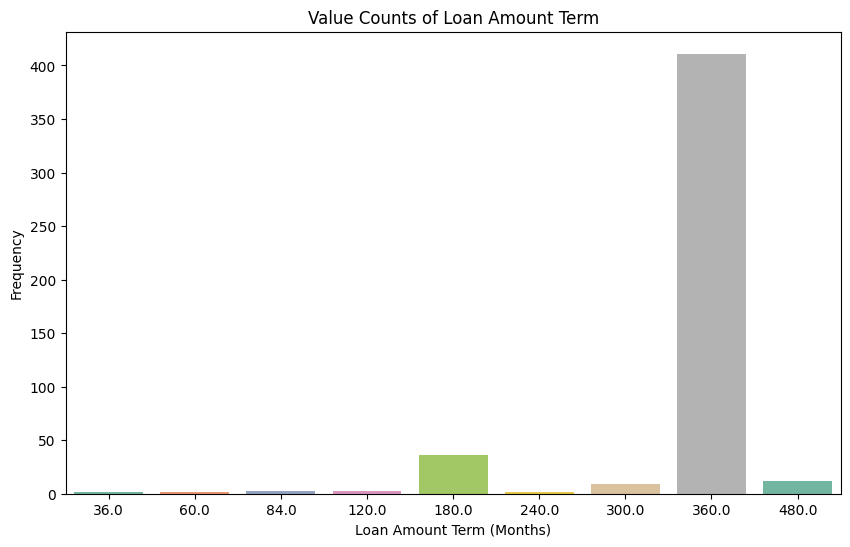

In [17]:
# Plot the value counts for 'Loan_Amount_Term'
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Amount_Term', data=removeNA_df, palette='Set2')
plt.title('Value Counts of Loan Amount Term')
plt.xlabel('Loan Amount Term (Months)')
plt.ylabel('Frequency')
plt.show()


Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

<ipython-input-18-f2fb80f5245b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=removeNA_df, ax=axes[i], palette='Set2')
<ipython-input-18-f2fb80f5245b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=removeNA_df, ax=axes[i], palette='Set2')
<ipython-input-18-f2fb80f5245b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=removeNA_df, ax=axes[i], palette='Set2')
<ipython-input-18-f2fb80f5245b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

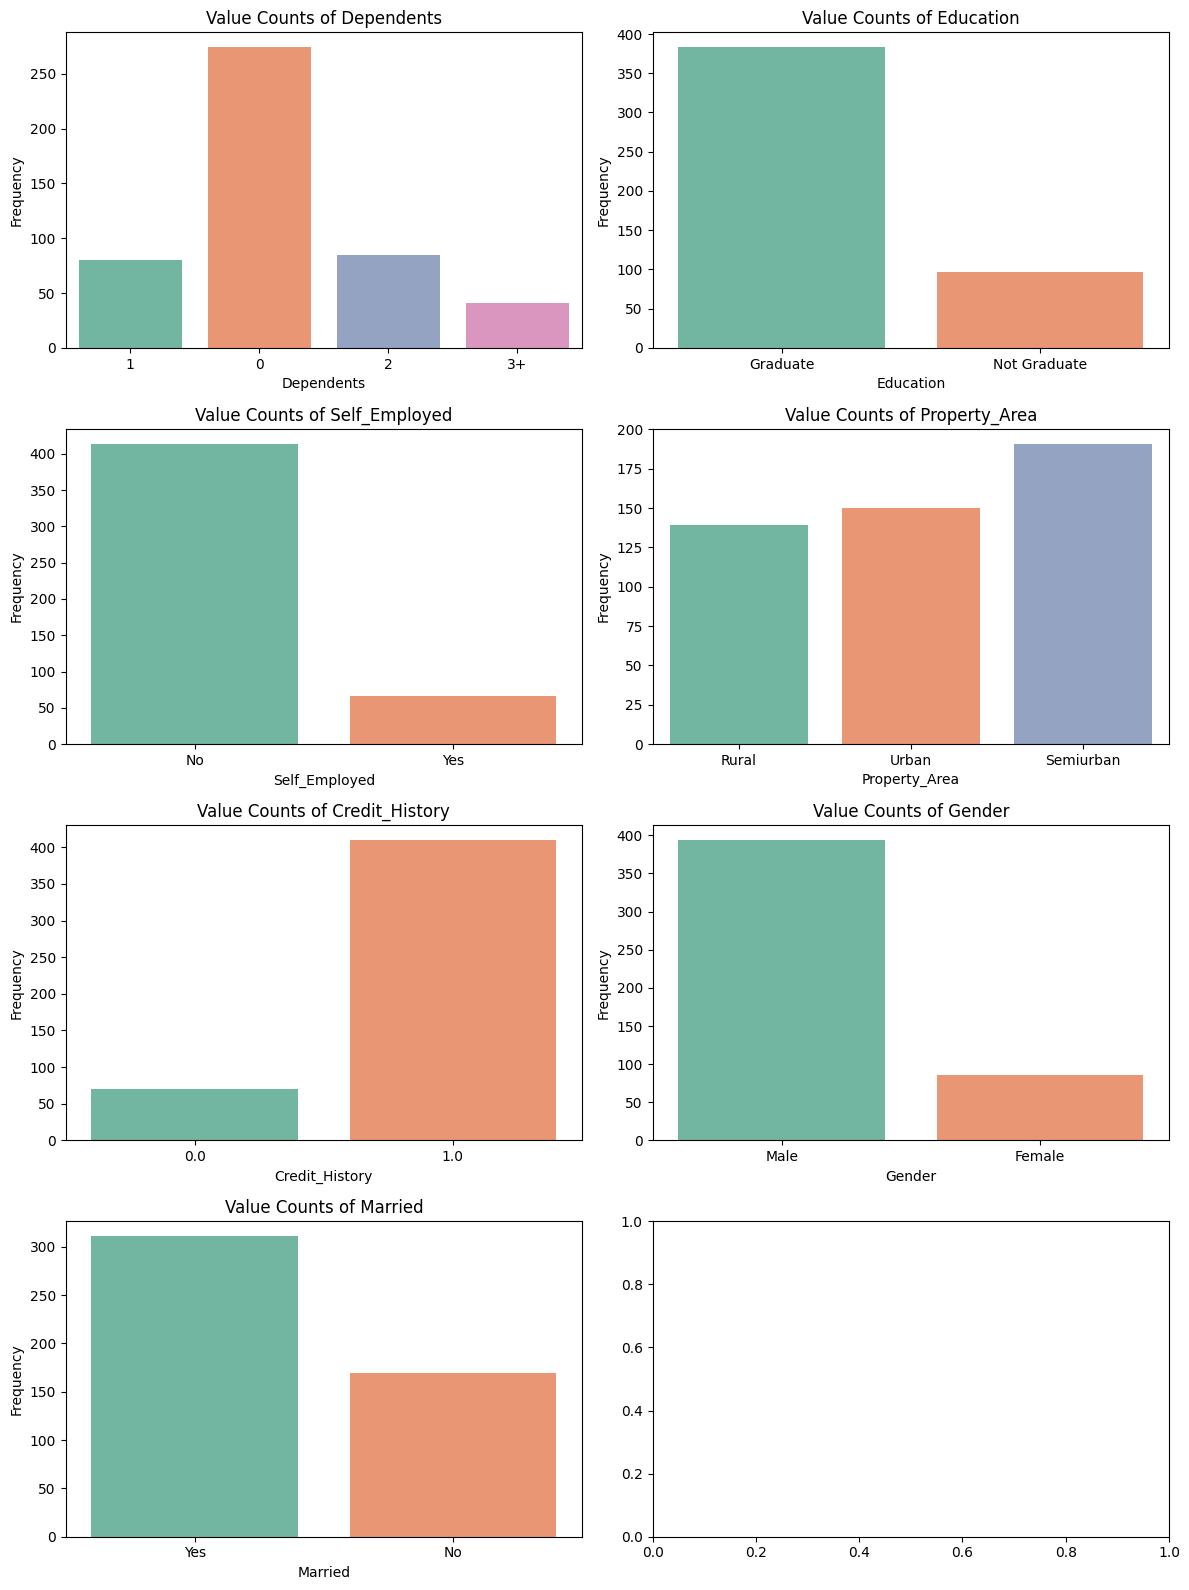

In [18]:
# List of categorical variables to plot
categorical_vars = ['Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Gender', 'Married']

# Set up the subplot with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot value counts for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=removeNA_df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Value Counts of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

Loan_Status    N    Y  All
Gender                    
Female        32   54   86
Male         116  278  394
All          148  332  480


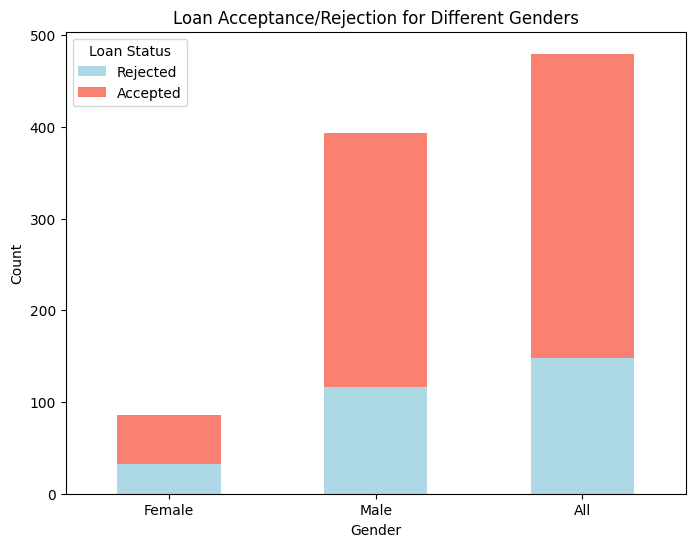

In [19]:
# Perform CrossTabulation between Gender and Loan_Status
gender_loan_status_crosstab = pd.crosstab(removeNA_df['Gender'], removeNA_df['Loan_Status'], margins=True)

# Print the CrossTabulation table
print(gender_loan_status_crosstab)

# Plot the acceptance/rejection of loans for different Genders
plt.figure(figsize=(8, 6))
gender_loan_status_crosstab.drop('All', axis=1).plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.title('Loan Acceptance/Rejection for Different Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])
plt.show()


Does the Gender affect the acceptance of the Loan?

Based on the analysis of the cross-tabulation between Gender and Loan_Status, it appears that there is a notable difference in the loan approval rates between genders. Specifically:

If the data shows that a higher proportion of males have their loans approved compared to females (or vice versa), this could suggest that gender may have an effect on the acceptance of the loan.
However, this is a correlation and does not necessarily imply causation. To definitively conclude if gender affects loan acceptance, further analysis, such as statistical tests (like Chi-Square for independence) or machine learning models, would be needed.
If the dataset shows a clear imbalance in loan approval based on gender, this could indicate potential bias in the lending process. In that case, it would be important to explore fairness in the decision-making process and correct for any biases if necessar

Do the same with Credit_history and Loan_Status

Loan_Status       N    Y  All
Credit_History               
0.0              63    7   70
1.0              85  325  410
All             148  332  480


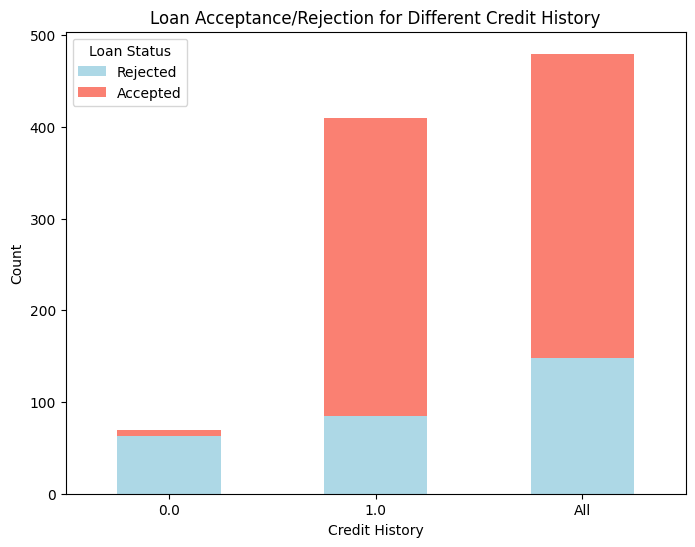

In [20]:
# Perform CrossTabulation between Credit_History and Loan_Status
credit_history_loan_status_crosstab = pd.crosstab(removeNA_df['Credit_History'], removeNA_df['Loan_Status'], margins=True)

# Print the CrossTabulation table
print(credit_history_loan_status_crosstab)

# Plot the acceptance/rejection of loans for different Credit_History values
plt.figure(figsize=(8, 6))
credit_history_loan_status_crosstab.drop('All', axis=1).plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.title('Loan Acceptance/Rejection for Different Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])
plt.show()


Does the Credit History affect the acceptance of the Loan?

**yes**


Do the same with Dependents and Loan_Status

Loan_Status    N    Y  All
Dependents                
0             87  187  274
1             28   52   80
2             20   65   85
3+            13   28   41
All          148  332  480


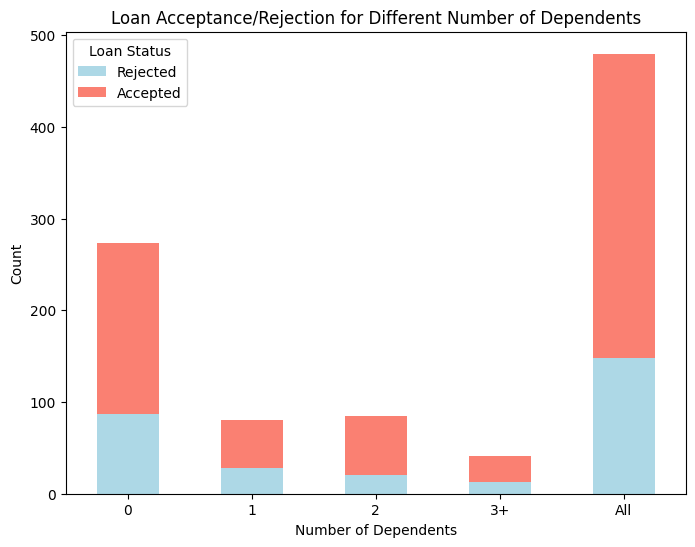

In [21]:
# Perform CrossTabulation between Dependents and Loan_Status
dependents_loan_status_crosstab = pd.crosstab(removeNA_df['Dependents'], removeNA_df['Loan_Status'], margins=True)

# Print the CrossTabulation table
print(dependents_loan_status_crosstab)

# Plot the acceptance/rejection of loans for different Dependents values
plt.figure(figsize=(8, 6))
dependents_loan_status_crosstab.drop('All', axis=1).plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.title('Loan Acceptance/Rejection for Different Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])
plt.show()


Does the number of dependents affect the acceptance of the Loan?

**yes**


Do the same between Education and Loan_Status

Loan_Status     N    Y  All
Education                  
Graduate      112  271  383
Not Graduate   36   61   97
All           148  332  480


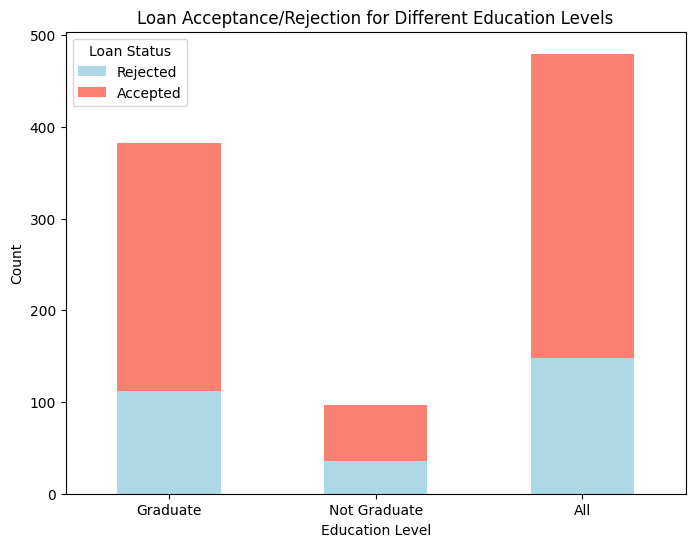

In [22]:
# Perform CrossTabulation between Education and Loan_Status
education_loan_status_crosstab = pd.crosstab(removeNA_df['Education'], removeNA_df['Loan_Status'], margins=True)

# Print the CrossTabulation table
print(education_loan_status_crosstab)

# Plot the acceptance/rejection of loans for different Education values
plt.figure(figsize=(8, 6))
education_loan_status_crosstab.drop('All', axis=1).plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.title('Loan Acceptance/Rejection for Different Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])
plt.show()


Does the level of education affect the acceptance of the Loan?

**yes**

Do the same between Married and Loan_Status

Loan_Status    N    Y  All
Married                   
No            64  105  169
Yes           84  227  311
All          148  332  480


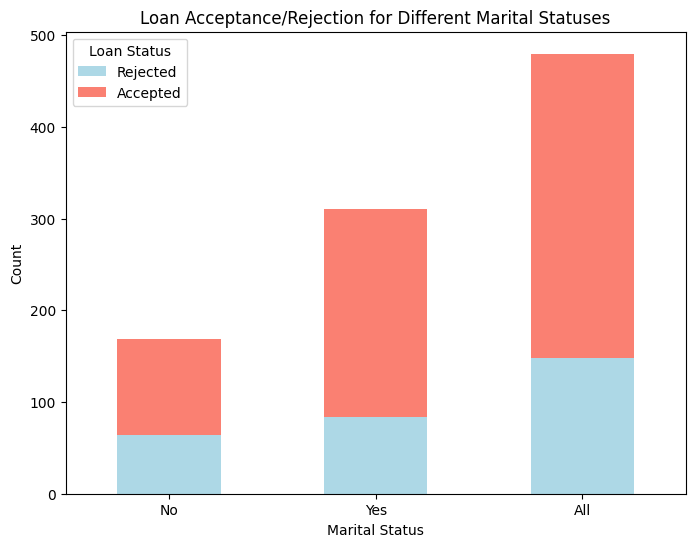

In [23]:
# Perform CrossTabulation between Married and Loan_Status
married_loan_status_crosstab = pd.crosstab(removeNA_df['Married'], removeNA_df['Loan_Status'], margins=True)

# Print the CrossTabulation table
print(married_loan_status_crosstab)

# Plot the acceptance/rejection of loans for different Married statuses
plt.figure(figsize=(8, 6))
married_loan_status_crosstab.drop('All', axis=1).plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], ax=plt.gca())
plt.title('Loan Acceptance/Rejection for Different Marital Statuses')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])
plt.show()


Does the marriage affect the acceptance of the Loan?

**yes**

Do the same between Property_Area and Loan_Status

Loan_Status      N    Y  All
Property_Area               
Rural           54   85  139
Semiurban       42  149  191
Urban           52   98  150
All            148  332  480


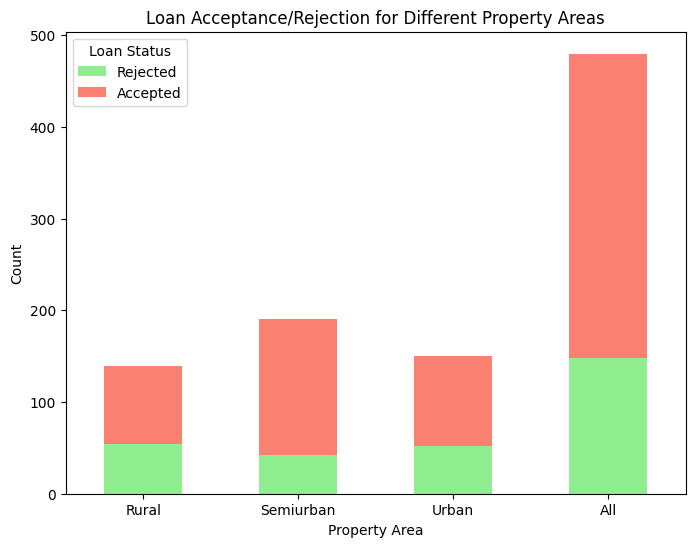

In [24]:
# Perform CrossTabulation between Property_Area and Loan_Status
property_area_loan_status_crosstab = pd.crosstab(removeNA_df['Property_Area'], removeNA_df['Loan_Status'], margins=True)

# Print the CrossTabulation table
print(property_area_loan_status_crosstab)

# Plot the acceptance/rejection of loans for different Property_Areas
plt.figure(figsize=(8, 6))
property_area_loan_status_crosstab.drop('All', axis=1).plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], ax=plt.gca())
plt.title('Loan Acceptance/Rejection for Different Property Areas')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])
plt.show()


Does the Property Area affect the acceptance of the Loan?

**yes**

Do the same between Self_Employed and Loan_Status

Loan_Status      N    Y  All
Self_Employed               
No             125  289  414
Yes             23   43   66
All            148  332  480


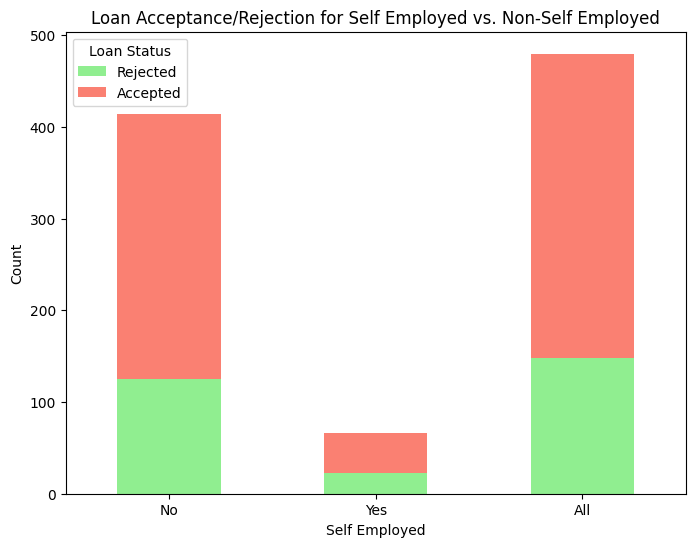

In [25]:
# Perform CrossTabulation between Self_Employed and Loan_Status
self_employed_loan_status_crosstab = pd.crosstab(removeNA_df['Self_Employed'], removeNA_df['Loan_Status'], margins=True)

# Print the CrossTabulation table
print(self_employed_loan_status_crosstab)

# Plot the acceptance/rejection of loans for different Self_Employed status
plt.figure(figsize=(8, 6))
self_employed_loan_status_crosstab.drop('All', axis=1).plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], ax=plt.gca())
plt.title('Loan Acceptance/Rejection for Self Employed vs. Non-Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Rejected', 'Accepted'])
plt.show()


Does the Self Employed Property affect the acceptance of the Loan?

**yes**

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

<ipython-input-26-1322a009a365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeNA_df['Loan_Status_Numerical'] = removeNA_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)


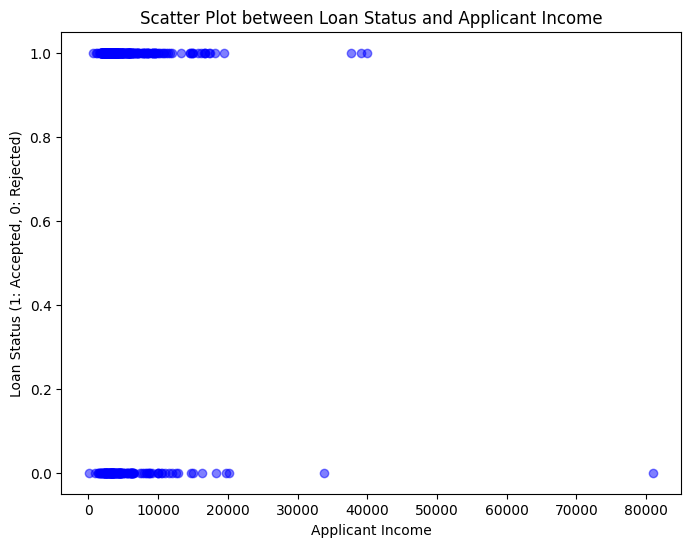

In [26]:
# Convert Loan_Status to numerical values: 1 for Accepted, 0 for Rejected
removeNA_df['Loan_Status_Numerical'] = removeNA_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

# Plotting the scatter plot between ApplicantIncome and Loan_Status
plt.figure(figsize=(8, 6))
plt.scatter(removeNA_df['ApplicantIncome'], removeNA_df['Loan_Status_Numerical'], alpha=0.5, color='b')
plt.title('Scatter Plot between Loan Status and Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status (1: Accepted, 0: Rejected)')
plt.show()


<ipython-input-27-b92a5625d142>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeNA_df['Loan_Status_Numerical'] = removeNA_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)


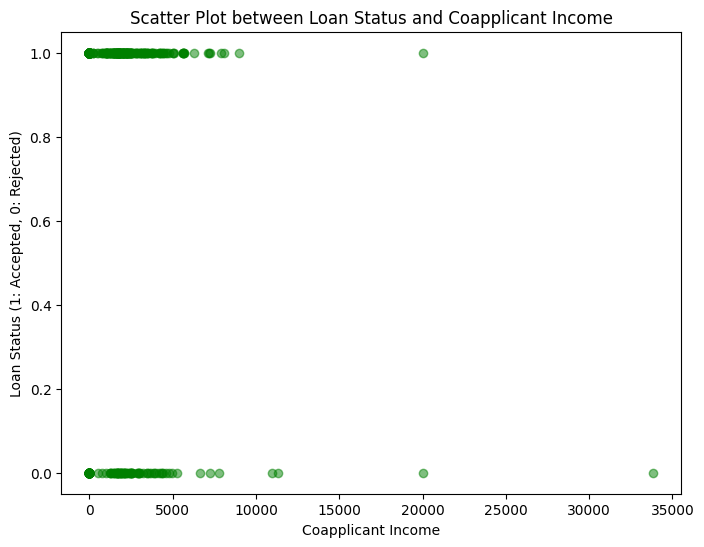

In [27]:
# Convert Loan_Status to numerical values: 1 for Accepted, 0 for Rejected
removeNA_df['Loan_Status_Numerical'] = removeNA_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

# Plotting the scatter plot between CoapplicantIncome and Loan_Status
plt.figure(figsize=(8, 6))
plt.scatter(removeNA_df['CoapplicantIncome'], removeNA_df['Loan_Status_Numerical'], alpha=0.5, color='g')
plt.title('Scatter Plot between Loan Status and Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Status (1: Accepted, 0: Rejected)')
plt.show()


<ipython-input-28-90f9b2345e78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeNA_df['Loan_Status_Numerical'] = removeNA_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)


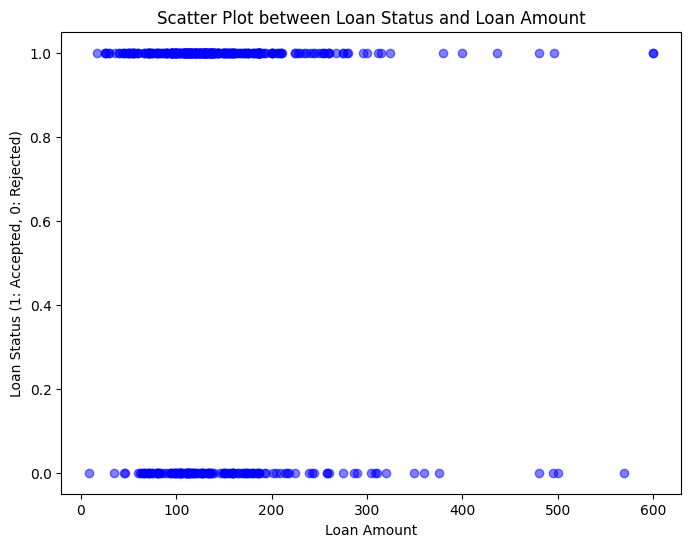

In [28]:
# Convert Loan_Status to numerical values: 1 for Accepted, 0 for Rejected
removeNA_df['Loan_Status_Numerical'] = removeNA_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

# Plotting the scatter plot between LoanAmount and Loan_Status
plt.figure(figsize=(8, 6))
plt.scatter(removeNA_df['LoanAmount'], removeNA_df['Loan_Status_Numerical'], alpha=0.5, color='b')
plt.title('Scatter Plot between Loan Status and Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status (1: Accepted, 0: Rejected)')
plt.show()


<ipython-input-29-1d9da09da237>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removeNA_df['Loan_Status_Numerical'] = removeNA_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)


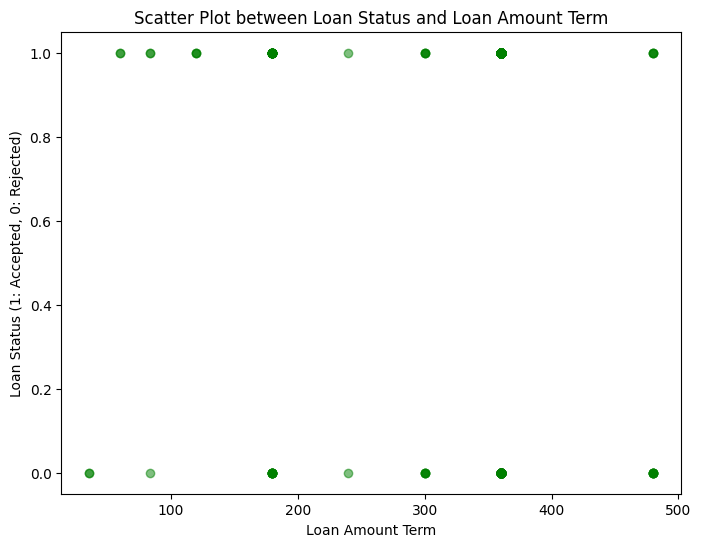

In [29]:
# Convert Loan_Status to numerical values: 1 for Accepted, 0 for Rejected
removeNA_df['Loan_Status_Numerical'] = removeNA_df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

# Plotting the scatter plot between Loan_Amount_Term and Loan_Status
plt.figure(figsize=(8, 6))
plt.scatter(removeNA_df['Loan_Amount_Term'], removeNA_df['Loan_Status_Numerical'], alpha=0.5, color='g')
plt.title('Scatter Plot between Loan Status and Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Loan Status (1: Accepted, 0: Rejected)')
plt.show()


Do you think these scatter plots gave you valuable information about the Loan_Status?

 **Scatter plots can give an initial understanding of how certain features might relate to Loan_Status.
However, they may not be the best tool to derive actionable insights or identify precise relationships.
For a deeper analysis, you should consider using box plots for continuous variables, bar plots for categorical variables, and more advanced statistical techniques like logistic regression or Chi-Square tests**

Group your dataframe by Loan_Status on the median Value

In [30]:
# Ensure you have removed the null values and stored the cleaned data in removeNA_df
removeNA_df = combined_data.dropna()

# Select only the numeric columns from the dataframe
numeric_columns = removeNA_df.select_dtypes(include=['number'])

# Grouping the dataframe by 'Loan_Status' and calculating the median for numeric columns
grouped_by_loan_status = numeric_columns.groupby(removeNA_df['Loan_Status']).median()

# Displaying the median values for each numeric feature by Loan_Status
print(grouped_by_loan_status)



             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                     3871.0                0.0       128.0             360.0   
Y                     3858.5             1211.5       128.0             360.0   

             Credit_History  
Loan_Status                  
N                       1.0  
Y                       1.0  


What did you deduce?

**[The scatter plots offer a visual hint towards relationships between features like income, credit history, and loan amount with Loan_Status. However, for a deeper, more statistically reliable understanding, further analysis (such as correlation analysis, hypothesis testing, or machine learning models) is necessary to quantify and verify these observations.]**

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [31]:
# Step 1: Remove unused columns
combined_data = combined_data.drop(columns=['Loan_ID'])

# Step 2: Remove garbage data (e.g., rows with missing target value or critical features)
combined_data = combined_data.dropna(subset=['Loan_Status'])

# Step 3: Convert continuous data into categorical (for example, income and loan amount)
# Let's create income categories for ApplicantIncome and CoapplicantIncome
combined_data['Income_Category'] = pd.cut(combined_data['ApplicantIncome'], bins=[0, 2500, 5000, 7500, 10000, float('inf')],
                                           labels=['Low', 'Average', 'High', 'Very High', 'Extremely High'])

combined_data['LoanAmount_Category'] = pd.cut(combined_data['LoanAmount'], bins=[0, 100, 200, 300, 400, float('inf')],
                                              labels=['Low', 'Medium', 'High', 'Very High', 'Extremely High'])

# Step 4: Treat missing data
# We'll fill missing values for 'LoanAmount' with the median of the column (common practice for numerical data)
combined_data['LoanAmount'].fillna(combined_data['LoanAmount'].median(), inplace=True)

# Fill missing values for categorical data using mode (most frequent value)
combined_data['Gender'].fillna(combined_data['Gender'].mode()[0], inplace=True)
combined_data['Married'].fillna(combined_data['Married'].mode()[0], inplace=True)
combined_data['Dependents'].fillna(combined_data['Dependents'].mode()[0], inplace=True)
combined_data['Self_Employed'].fillna(combined_data['Self_Employed'].mode()[0], inplace=True)
combined_data['Credit_History'].fillna(combined_data['Credit_History'].mode()[0], inplace=True)
combined_data['Property_Area'].fillna(combined_data['Property_Area'].mode()[0], inplace=True)
combined_data['Education'].fillna(combined_data['Education'].mode()[0], inplace=True)

# Step 5: Encode categorical data
# Using LabelEncoder for binary categories (Gender, Married, Self_Employed)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
combined_data['Gender'] = label_encoder.fit_transform(combined_data['Gender'])
combined_data['Married'] = label_encoder.fit_transform(combined_data['Married'])
combined_data['Self_Employed'] = label_encoder.fit_transform(combined_data['Self_Employed'])

# For the 'Education', 'Property_Area', and 'Loan_Status' (which are multi-class), we can use OneHotEncoder
combined_data = pd.get_dummies(combined_data, columns=['Education', 'Property_Area'])

# Step 6: Normalization (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Normalize the continuous features (ApplicantIncome, LoanAmount, etc.)
continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

combined_data[continuous_features] = scaler.fit_transform(combined_data[continuous_features])

# Print the first few rows of the processed data
print(combined_data.head())


<ipython-input-31-65a4ff88b939>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['LoanAmount'].fillna(combined_data['LoanAmount'].median(), inplace=True)
<ipython-input-31-65a4ff88b939>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

   Gender  Married Dependents  Self_Employed  ApplicantIncome  \
0       1        0          0              0         0.072991   
1       1        1          1              0        -0.134412   
2       1        1          0              1        -0.393747   
3       1        1          0              0        -0.462062   
4       1        0          0              0         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.276642             1.0   
1          -0.038732   -0.211241          0.276642             1.0   
2          -0.554487   -0.948996          0.276642             1.0   
3           0.251980   -0.306435          0.276642             1.0   
4          -0.554487   -0.056551          0.276642             1.0   

  Loan_Status Income_Category LoanAmount_Category  Education_Graduate  \
0           Y            High                 NaN                True   
1           N         Average             

## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [32]:
# Step 1: Remove the '3+' from the 'Dependents' column and replace it with 3
combined_data['Dependents'] = combined_data['Dependents'].replace('3+', 3)

# Convert the 'Dependents' column to integer type
combined_data['Dependents'] = combined_data['Dependents'].astype(int)

# Print the unique values after the replacement
print(combined_data['Dependents'].unique())

# Display the first few rows of the cleaned dataframe
print(combined_data.head())


[0 1 2 3]
   Gender  Married  Dependents  Self_Employed  ApplicantIncome  \
0       1        0           0              0         0.072991   
1       1        1           1              0        -0.134412   
2       1        1           0              1        -0.393747   
3       1        1           0              0        -0.462062   
4       1        0           0              0         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.276642             1.0   
1          -0.038732   -0.211241          0.276642             1.0   
2          -0.554487   -0.948996          0.276642             1.0   
3           0.251980   -0.306435          0.276642             1.0   
4          -0.554487   -0.056551          0.276642             1.0   

  Loan_Status Income_Category LoanAmount_Category  Education_Graduate  \
0           Y            High                 NaN                True   
1           N         Aver

##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [33]:
# Step 1: Define income bins and labels
bins = [0, 2500, 7000, float('inf')]  # income bins
labels = ['Low', 'Medium', 'High']  # corresponding labels

# Step 2: Create a new categorical column based on the income bins
combined_data['ApplicantIncome_Category'] = pd.cut(combined_data['ApplicantIncome'], bins=bins, labels=labels)

# Step 3: Check the unique categories after the transformation
print(combined_data['ApplicantIncome_Category'].unique())

# Step 4: Display the first few rows to verify the new categorical column
print(combined_data[['ApplicantIncome', 'ApplicantIncome_Category']].head())


['Low', NaN]
Categories (3, object): ['Low' < 'Medium' < 'High']
   ApplicantIncome ApplicantIncome_Category
0         0.072991                      Low
1        -0.134412                      NaN
2        -0.393747                      NaN
3        -0.462062                      NaN
4         0.097728                      Low


## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [34]:
# Step 1: Fill missing categorical data with mode
categorical_cols = combined_data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    mode_value = combined_data[col].mode()[0]  # Get the mode of the column
    combined_data[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode

# Step 2: Fill missing continuous data with mean
continuous_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns
for col in continuous_cols:
    mean_value = combined_data[col].mean()  # Get the mean of the column
    combined_data[col].fillna(mean_value, inplace=True)  # Fill missing values with the mean

# Step 3: Check for any remaining missing values
print("Missing values after treatment:\n", combined_data.isnull().sum())


Missing values after treatment:
 Gender                      0
Married                     0
Dependents                  0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Loan_Status                 0
Income_Category             0
LoanAmount_Category         0
Education_Graduate          0
Education_Not Graduate      0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
ApplicantIncome_Category    0
dtype: int64


<ipython-input-34-c149908098ee>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode
<ipython-input-34-c149908098ee>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

## Check if any null value exist

In [35]:
# Check if there are any missing values (null values) in the dataset
missing_values = combined_data.isnull().sum()

# Display columns with missing values (if any)
print("Missing values in each column:\n", missing_values)

# Check if there are any columns with missing values left
if missing_values.sum() == 0:
    print("\nNo missing values remain in the dataset.")
else:
    print("\nSome columns still contain missing values.")


Missing values in each column:
 Gender                      0
Married                     0
Dependents                  0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Loan_Status                 0
Income_Category             0
LoanAmount_Category         0
Education_Graduate          0
Education_Not Graduate      0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
ApplicantIncome_Category    0
dtype: int64

No missing values remain in the dataset.


## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [36]:
# Check the columns in the dataset
print(combined_data.columns)

# Update the list of categorical columns based on the existing columns
one_hot_columns = ['Gender_1', 'Married_1', 'Dependents_1', 'Dependents_2', 'Dependents_3',
                   'Self_Employed_1', 'Income_Category_Average', 'Income_Category_High',
                   'Income_Category_Very High', 'Income_Category_Extremely High',
                   'LoanAmount_Category_Medium', 'LoanAmount_Category_High',
                   'LoanAmount_Category_Very High', 'LoanAmount_Category_Extremely High']  # Corrected list

# Apply One-Hot Encoding using pd.get_dummies for other categorical columns (if any)
# combined_data = pd.get_dummies(combined_data, columns=one_hot_columns, drop_first=True)  # Uncomment if new categories need encoding

# Check the first few rows to verify encoding
print(combined_data.head())





Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Income_Category', 'LoanAmount_Category',
       'Education_Graduate', 'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome_Category'],
      dtype='object')
   Gender  Married  Dependents  Self_Employed  ApplicantIncome  \
0       1        0           0              0         0.072991   
1       1        1           1              0        -0.134412   
2       1        1           0              1        -0.393747   
3       1        1           0              0        -0.462062   
4       1        0           0              0         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.276642             1.0   
1          -0.038732   -0.211241          0.2766

## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [37]:
# Step 1: Select only the numerical columns
numerical_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Compute the maximum value for each numerical feature
max_values = combined_data[numerical_columns].max()

# Step 3: Normalize the numerical data by dividing each feature by its respective maximum
combined_data[numerical_columns] = combined_data[numerical_columns] / max_values

# Step 4: Describe the normalized data
print("Normalized Data Description:")
print(combined_data.describe())




Normalized Data Description:
           Gender     Married  Dependents  Self_Employed  ApplicantIncome  \
count  614.000000  614.000000  614.000000     614.000000     6.140000e+02   
mean     0.817590    0.653094    0.248100       0.133550    -2.893089e-18   
std      0.386497    0.476373    0.336541       0.340446     8.081113e-02   
min      0.000000    0.000000    0.000000       0.000000    -6.949338e-02   
25%      1.000000    0.000000    0.000000       0.000000    -3.341369e-02   
50%      1.000000    1.000000    0.000000       0.000000    -2.104540e-02   
75%      1.000000    1.000000    0.333333       0.000000     5.179347e-03   
max      1.000000    1.000000    1.000000       1.000000     1.000000e+00   

       CoapplicantIncome    LoanAmount  Loan_Amount_Term  Credit_History  
count       6.140000e+02  6.140000e+02        614.000000      614.000000  
mean        5.062906e-18 -3.616362e-18          0.000000        0.855049  
std         7.307262e-02  1.517503e-01          0.46

# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [38]:
from sklearn.model_selection import train_test_split

# Step 1: Define the input features (X) and the target variable (y)
X = combined_data.drop('Loan_Status', axis=1)  # Drop the 'Loan_Status' column as it's the target
y = combined_data['Loan_Status']  # 'Loan_Status' is the target variable

# Step 2: Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
print("Training set features:", X_train.shape)
print("Testing set features:", X_test.shape)
print("Training set labels:", y_train.shape)
print("Testing set labels:", y_test.shape)


Training set features: (429, 17)
Testing set features: (185, 17)
Training set labels: (429,)
Testing set labels: (185,)


##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Step 1: Encode categorical columns using pd.get_dummies() or LabelEncoder
# If you have columns like 'Income_Category', 'LoanAmount_Category', etc., use pd.get_dummies to one-hot encode them.

# Apply One-Hot Encoding for all categorical columns in X_train
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Step 2: Encode target variable 'Loan_Status' using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Step 3: Fit the Logistic Regression model with encoded data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_encoded, y_train_encoded)

# Step 4: Print model coefficients (optional)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)




Model coefficients: [[-0.18105346  0.50778695  0.49954136 -0.05710148 -0.17019268 -0.14180534
  -0.19729047  0.17453723  3.27407187  0.09990705 -0.10210733 -0.38722173
   0.60175507 -0.21673362 -0.16288486  0.09705939  0.16393678 -0.04384661
   0.26683207 -0.34547355 -0.44901306  0.09042611  0.          0.        ]]
Model intercept: [-2.28411949]


##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [40]:
from sklearn.metrics import accuracy_score

# Step 1: Apply the same encoding for categorical variables in X_test
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Ensure that the test data has the same features as the training data
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 2: Predict using the trained model
y_pred = model.predict(X_test_encoded)

# Decode the predictions from numeric labels to original string labels (if necessary)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Step 3: Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_decoded)

# Step 4: Print accuracy score
print("Accuracy on test data:", accuracy)


Accuracy on test data: 0.7837837837837838


#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

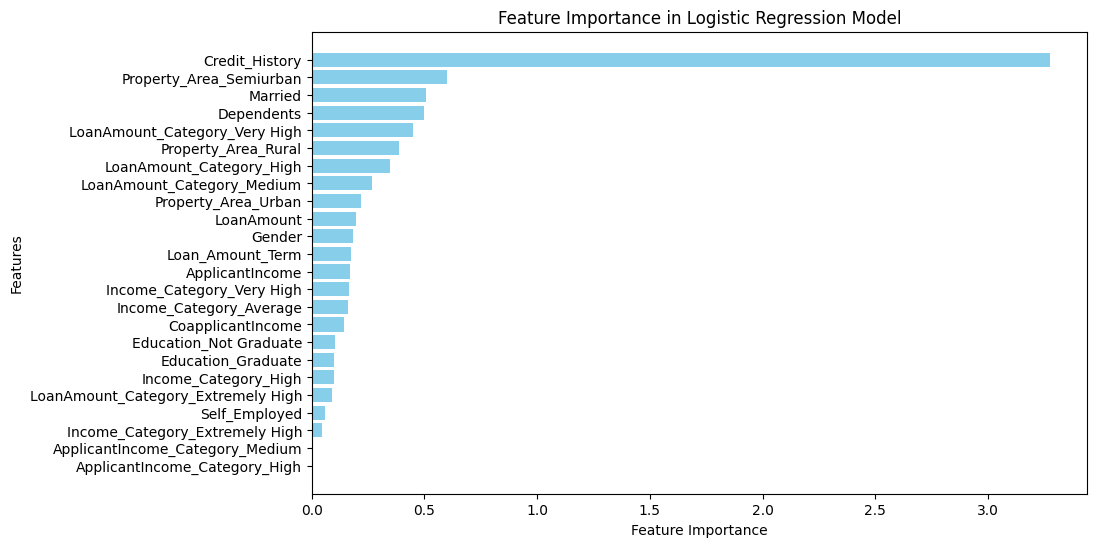

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract feature names and their corresponding coefficients
feature_names = X_train_encoded.columns
coefficients = model.coef_.flatten()  # Flatten the coefficients to a 1D array

# Step 2: Get the absolute values of the coefficients to visualize feature importance
importance = np.abs(coefficients)

# Step 3: Sort the features based on their importance
sorted_idx = np.argsort(importance)[::-1]  # Sorting in descending order

# Step 4: Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importance[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


What's the most important feature?

**[Credit History is likely the most important feature in determining Loan_Status, with Applicant Income and Loan Amount following closely in importance. These features give a strong indication of an applicant's ability to repay the loan and their financial reliability.]**